In [1]:
import numpy as np
import pandas as pd
import matplotlib 
#matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataframe
analysis = pd.read_pickle('/Users/annabroido/Dropbox/Research/LRTAnalysis/LRTAnalysis/analysis/analysis.p')
# dataframe with non-nan alpha values
analysis = analysis.query("alpha!=''")
# pull out all alpha values (not nans)
alphaV = analysis['alpha'].values
# pull out just alphas with corresponding p>0.1
analysis_alphap = analysis.query('ppl> 0.1')
alphapV = analysis_alphap['alpha'].values
# pull out alphas with p>0.1 and ntail>50
alphapnV = analysis.query('ppl>0.1 and ntail > 50')['alpha'].values
np.savetxt("one.csv",alphaV,delimiter=',')
np.savetxt("two.csv",alphapV,delimiter=',')
np.savetxt("three.csv",alphapnV,delimiter=',')

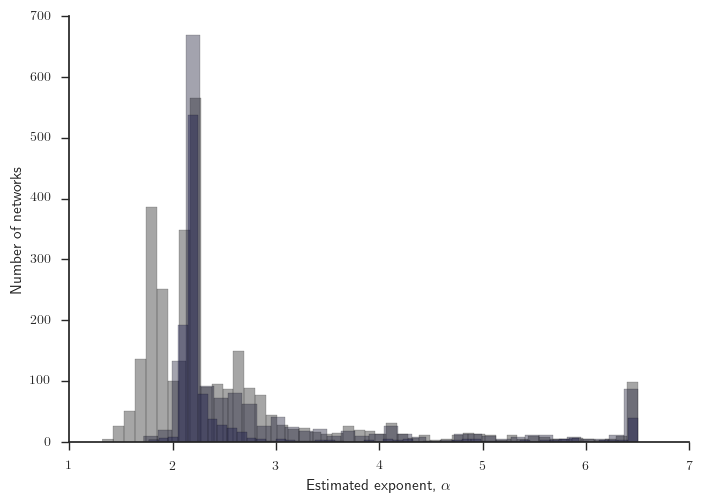

In [3]:
sns.set_context("talk")
sns.set(rc={'text.usetex' : True})
# sns.set_palette(sns.dark_palette('navy', input = 'xkcd', reverse=True))
sns.set_palette(sns.dark_palette("navy"))
sns.set_style('ticks')
fix,ax = plt.subplots()
pairs = [(alphaV, 'blue'), (alphapV, 'g'), (alphapnV, 'y')]
#for a, c in pairs:
for a in [alphaV, alphapV, alphapnV]:
    sns.distplot(a, hist=True, kde=False, ax=ax )
ax.set(xlabel=r'Estimated exponent, $\alpha$', ylabel = 'Number of networks')
sns.despine()
plt.show()

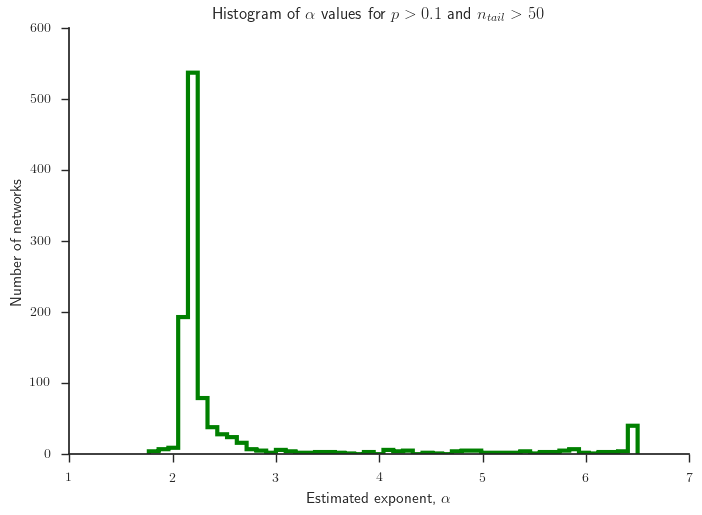

In [4]:
sns.set_context("talk")
sns.set(rc={'text.usetex' : True})
# sns.set_palette(sns.dark_palette('navy', input = 'xkcd', reverse=True))
sns.set_palette(sns.dark_palette("navy"))
sns.set_style('ticks')
fix,ax = plt.subplots()
sns.distplot(alphapnV, hist=True, kde=False, ax=ax,hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
ax.set(xlabel=r'Estimated exponent, $\alpha$', ylabel = 'Number of networks', title=r'Histogram of $\alpha$ values for $p>0.1$ and $n_{tail}>50')
sns.despine()
plt.show()

In [18]:
meanalpha = np.mean(alphaV)
meanalphap = np.mean(alphapV)
meanalphapn = np.mean(alphapnV)
ntail = len(analysis.query('ntail>50'))
prejtail = len(analysis.query('ppl<0.1 and ntail>50'))/float(ntail)*100
percent_rejected = (1-(len(alphapV))/float(len(alphaV)))*100
print 'Mean alpha = %s' %meanalpha
print 'Mean alpha for p>0.1 = %s' %meanalphap
print r'Mean alpha for p>0.1 with ntail > 50 = %s' %meanalphapn
print 'Percent of networks that are rejected as power law = %0.2f%%' %percent_rejected
print r'Percent of networks with ntail> 50 that are rejected as power law = %0.2f%%' %prejtail
print 'Total number of networks = %s' %len(alphaV)
print 'Number of networks with p>0.1 = %s' %len(alphapV)
print 'Number of networks with p>0.1 and ntail>50 = %s' %len(alphapnV)

Mean alpha = 2.57043941411
Mean alpha for p>0.1 = 2.9049968254
Mean alpha for p>0.1 with ntail > 50 = 2.61473877177
Percent of networks that are rejected as power law = 47.57%
Percent of networks with ntail> 50 that are rejected as power law = 54.86%
Total number of networks = 3004
Number of networks with p>0.1 = 1575
Number of networks with p>0.1 and ntail>50 = 1091


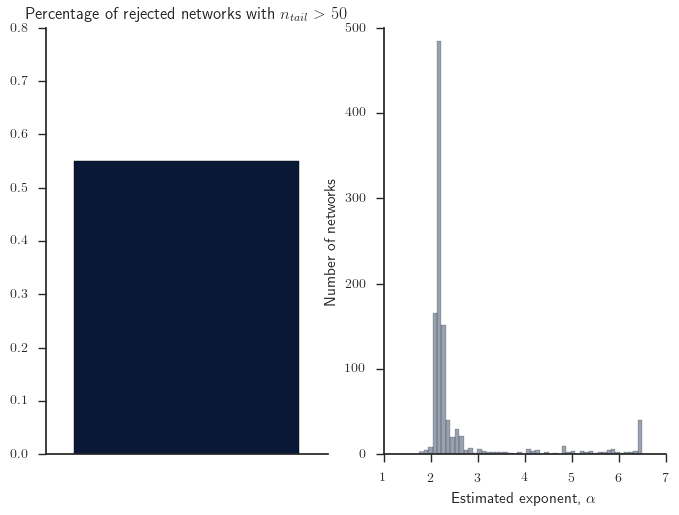

In [17]:
## Plot
fig = plt.figure()
sns.set_context("talk")
sns.set(rc={'text.usetex' : True})
sns.set_palette(sns.dark_palette('navy', input = 'xkcd', reverse=True))
sns.set_style('ticks')
ax1 = fig.add_subplot(1,2,1)
x = [1]
y = [prejtail/100]
sns.barplot(x=x, y=y)
ax1.set_xticks([])
y = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
ax1.set_yticks(y)
ax1.set(title=r'Percentage of rejected networks with $n_{tail}>50$')
ax2 = fig.add_subplot(1,2,2)
sns.distplot(alphapnV, kde=False)
ax2.set(xlabel=r'Estimated exponent, $\alpha$', ylabel = 'Number of networks')
sns.despine()
plt.show()

In [7]:
# data for histogram of data categories
df = analysis # could make this a subset, ie just largest components
cat = pd.Series()
# multiplex
#cat.loc['totalmp'] = len(df.query('Multiplex != 0'))
cat.loc['Multiplex'] = len(df.query('Multiplex != 0 & Bipartite == 0 & Multigraph ==0 & Weighted==0 & Directed == 0'))
#cat.loc['Multiplex Bipartite Multigraph'] = len(df.query('Multiplex != 0 & Bipartite != 0 & Multigraph!= 0 & Weighted==0 & Directed == 0'))
cat.loc['Multiplex Multigraph'] = len(df.query('Multiplex != 0 & Bipartite == 0 & Multigraph != 0 & Weighted==0 & Directed == 0'))
#cat.loc['Multiplex Weighted Directed Multigraph'] = len(df.query('Multiplex != 0 & Bipartite == 0 & Multigraph != 0 & Weighted!=0 & Directed != 0'))
#cat.loc['Multiplex Directed Multigraph'] = len(df.query('Multiplex != 0 & Bipartite == 0 & Multigraph != 0 & Weighted==0 & Directed != 0'))
cat.loc['Multiplex Directed'] = len(df.query('Multiplex != 0 & Bipartite == 0 & Multigraph == 0 &Weighted==0 & Directed != 0'))

# bipartite
#cat.loc['totalbip'] = len(df.query('Multiplex==0 &Bipartite != 0'))
cat.loc['Bipartite'] = len(df.query('Multiplex==0 &Bipartite != 0 & Multigraph == 0 & Weighted==0 & Directed==0'))
cat.loc['Bipartite Weighted'] = len(df.query('Multiplex==0 & Bipartite != 0 & Multigraph == 0 & Weighted!=0 & Directed==0'))

# multigraph
cat.loc['Multigraph'] = len(df.query('Multiplex==0 & Bipartite == 0 & Multigraph != 0 & Weighted ==0 & Directed ==0'))

# weighted
#cat.loc['totalweigh'] = len(df.query('Multiplex==0 &Bipartite == 0 & Weighted!=0'))
cat.loc['Weighted'] = len(df.query('Multiplex==0 &Bipartite == 0 & Multigraph == 0 & Weighted!=0 & Directed==0'))
cat.loc['Weighted Directed'] = len(df.query('Multiplex==0 &Bipartite == 0 & Multigraph == 0 & Weighted!=0 & Directed!=0'))


# directed
cat.loc['Directed'] = len(df.query('Multiplex==0 &Bipartite == 0 & Weighted==0 & Directed!=0'))

#simple
cat.loc['Simple'] = len(df.query('Multiplex==0 &Bipartite == 0 & Weighted==0 & Directed==0'))

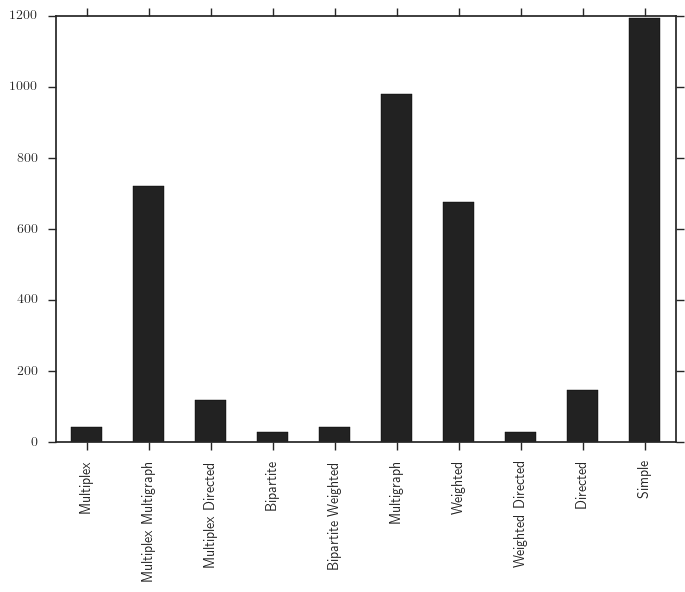

In [8]:
np.shape(cat.values)
np.shape(cat.axes[0])
plt.figure()
cat.plot.bar()
plt.show()

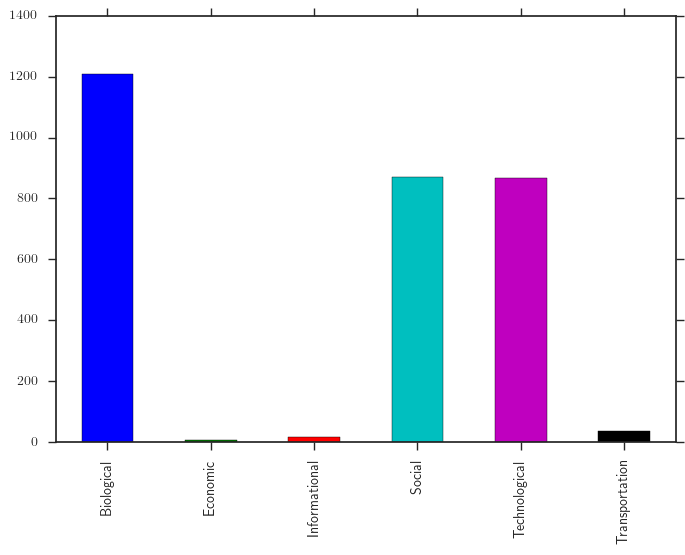

In [9]:
# data for histogram of domains 
df = analysis # could make this a subset, ie just largest components
domlist = np.unique(df['Domain'])
doms = pd.Series(data=np.zeros(len(domlist), dtype=int),index=domlist)
for dom in domlist:
    checkstr = 'Domain=="%s"' %dom
    doms.loc[dom] = len(df.query(checkstr))
colordict = {'Biological':'b', 'Economic':'g', 'Informational':'r', 'Social':'c', 'Technological':'m', 'Transportation':'k'}
#doms.plot.bar()
doms.plot(kind='bar', color=[colordict[dom] for dom in doms.index])
plt.show()


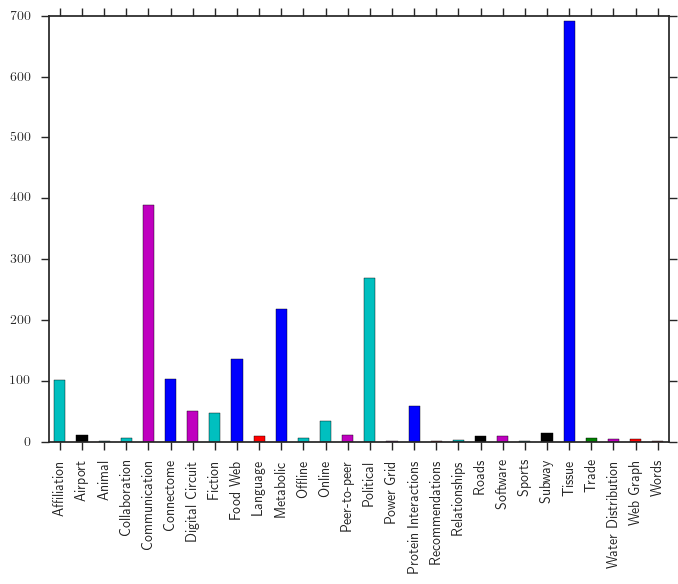

In [10]:
# data for histogram of domains 
df = analysis # could make this a subset, ie just largest components
sublist = np.unique(df['Subdomain'])
subs = pd.DataFrame(index=sublist, columns=['Counts', 'Domain', 'Color'])
#subs['Counts'] =np.zeros(len(sublist),dtype=int)
colordict = {'Biological':'b', 'Economic':'g', 'Informational':'r', 'Social':'c', 'Technological':'m', 'Transportation':'k'}
for sub in sublist:
    checkstr = 'Subdomain=="%s"' %sub
    subs.loc[sub]['Counts'] = len(df.query(checkstr))
    dom = df.query(checkstr)['Domain'][0]
    subs.loc[sub]['Domain'] = dom
    subs.loc[sub]['Color'] = colordict[dom]
subs = subs.rename(index={'Digital_Circuit': 'Digital Circuit'})
subs = subs.rename(index={'Food_web': 'Food Web'})
subs = subs.rename(index={'Power_grid': 'Power Grid'})
subs = subs.rename(index={'Protein_interactions': 'Protein Interactions'})
subs = subs.rename(index={'Web_graph': 'Web Graph'})
subs = subs.rename(index={'Water_Distribution': 'Water Distribution'})
subs.loc['Communication']['Counts'] -= 400
subs.loc['Political']['Counts'] -= 400
subs['Counts'].plot(kind='bar', color=[colordict[dom] for dom in subs['Domain']])
plt.show()




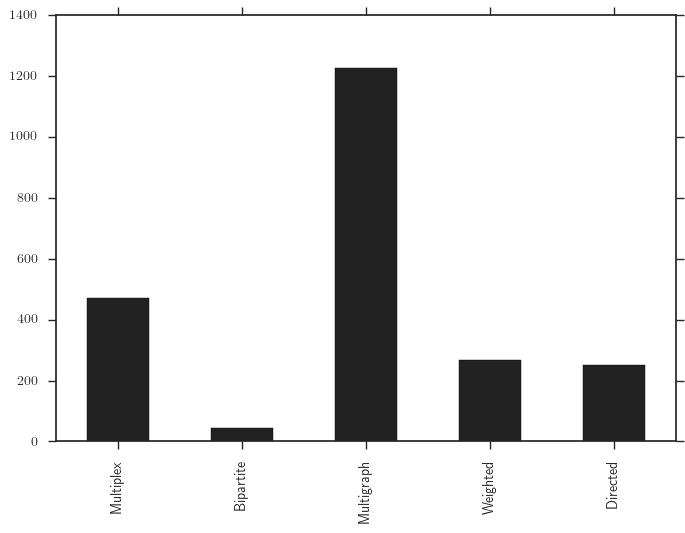

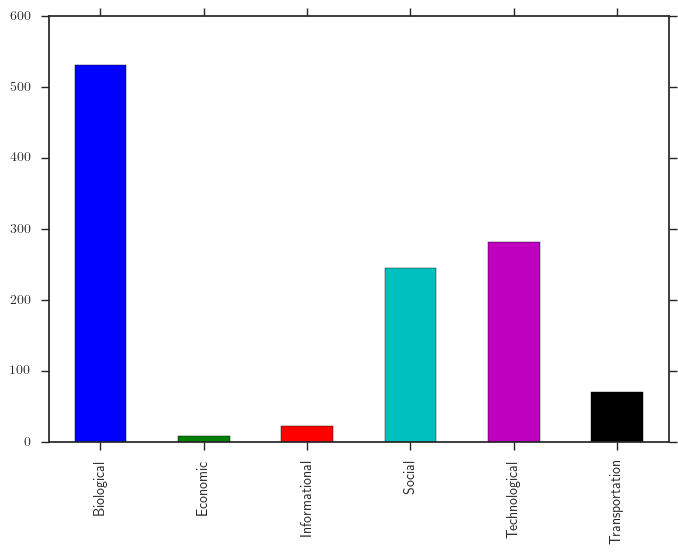

In [15]:
catalog = pd.read_pickle('/Users/annabroido/Dropbox/Research/LRTAnalysis/LRTAnalysis/analysis/gmlcatalog.p')
numnetworks = len(catalog)

gmldata = pd.Series()
gmldata.loc['Multiplex'] = len(catalog.query('Multiplex != 0'))
gmldata.loc['Bipartite'] = len(catalog.query('Bipartite != 0'))
gmldata.loc['Multigraph'] = len(catalog.query('Multigraph != 0'))
gmldata.loc['Weighted'] = len(catalog.query('Weighted != 0'))
gmldata.loc['Directed'] = len(catalog.query('Directed != 0'))
gmldata.plot(kind='bar')
plt.show()


# data for histogram of domains 
df = catalog # could make this a subset, ie just largest components
domlist = np.unique(df['Domain'])
doms = pd.Series(data=np.zeros(len(domlist), dtype=int),index=domlist)
for dom in domlist:
    checkstr = 'Domain=="%s"' %dom
    doms.loc[dom] = len(df.query(checkstr))
colordict = {'Biological':'b', 'Economic':'g', 'Informational':'r', 'Social':'c', 'Technological':'m', 'Transportation':'k'}
doms.loc['Technological'] -= 650
doms.loc['Social'] -= 200
doms.plot(kind='bar', color=[colordict[dom] for dom in doms.index])
plt.show()


In [16]:
def plpdf(x, alpha):
    C = (alpha-1)*(np.min(x)**(alpha-1))
    p = C*x**(-alpha)
    return p

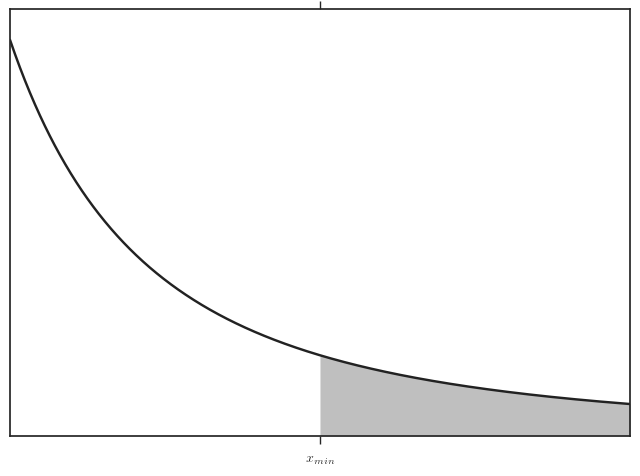

In [17]:
x = np.linspace(1,3, 1000)
xmin = 2
xtrunc = x[x>=xmin]
alpha = 2.3
y = plpdf(x,alpha)
start = len(y)- len(xtrunc)
ytrunc = y[start:]
plt.plot(x,y)
plt.fill_between(xtrunc,ytrunc, color='0.75')
plt.xticks([xmin], [r'$x_{min}$'])
ax = plt.gca()
ax.axes.get_yaxis().set_ticks([])
plt.show()

In [149]:
anal = set(analysis.fp_gml)
cat = set(catalog.query('Graph_order < 5').fp_gml)
len(anal)

1636